<a href="https://colab.research.google.com/github/jcj217-mc/Data201_Project_1/blob/main/jj_CT_bail_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [65]:
# .json file data imported as pandas data frame
# df = pd.read_json('https://data.ct.gov/resource/b674-jy6w.json')

In [66]:
# .csv file import
# First, check  working directory
# os.getcwd()
# If need to change working directory
# os.chdir(path)
df = pd.read_csv("Accused_Pre-Trial_Inmates_in_Correctional_Facilities (1).csv", index_col=False)

In [67]:
#Set CSV
#df_set = pd.read_csv("setdf.csv", index_col=False)

**Data Wrangling**

In [68]:
# Evaluating initial data 
df.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5355017 entries, 0 to 5355016
Data columns (total 10 columns):
 #   Column                                            Dtype 
---  ------                                            ----- 
 0   DOWNLOAD DATE                                     object
 1   IDENTIFIER                                        object
 2   LATEST ADMISSION DATE                             object
 3   RACE                                              object
 4   GENDER                                            object
 5   AGE                                               int64 
 6   BOND AMOUNT                                       int64 
 7   OFFENSE                                           object
 8   FACILITY                                          object
 9   DETAINER                                          object
dtypes: int64(2), object(8)
memory usage: 408.6+ MB


In [70]:
df.describe()

,AGE,BOND AMOUNT
count,5.355017e+06,5.355017e+06
mean,3.461006e+01,2.477937e+05
std,1.139501e+01,4.503512e+05
min,1.500000e+01,1.000000e+00
25%,2.600000e+01,3.350000e+04
50%,3.300000e+01,1.000000e+05
75%,4.200000e+01,2.500000e+05
max,8.700000e+01,9.200000e+06


In [71]:
#Checking Shape
print(df.shape)

(5355017, 10)


In [72]:
#Check DataFrame type
type(df)

pandas.core.frame.DataFrame

**Clean/Arrange Data**

In [73]:
# change column names
df = df.rename(columns = {"DOWNLOAD DATE": "Download_Date", "LATEST ADMISSION DATE": "Admission_Date", "BOND AMOUNT":"Bond"})
df.head()

,Download_Date,IDENTIFIER,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [74]:
# Drop Columns
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,IDENTIFIER,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [75]:
# Drop Columns
df.drop(df.columns[[-1]], axis=1, inplace=True)
df.head()

,IDENTIFIER,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY
0,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC
1,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI
2,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI
3,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC
4,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC


In [76]:
# Drop Columns
df.drop(df.columns[[-1]], axis=1, inplace=True)
df.head()

,IDENTIFIER,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE
0,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF
1,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG
2,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT
3,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF
4,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT


In [77]:
# Drop Columns
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF
1,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG
2,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT
3,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF
4,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT


In [78]:
# Checking data types for each column
print(df.dtypes)

Admission_Date    object
RACE              object
GENDER            object
AGE                int64
Bond               int64
OFFENSE           object
dtype: object


**Addressing NA/Null Values**

In [79]:
# Check null 
df.isnull()

,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5355012,False,False,False,False,False,False
5355013,False,False,False,False,False,False
5355014,False,False,False,False,False,False
5355015,False,False,False,False,False,False


In [80]:
# Null sum
df.isnull().sum()

Admission_Date    0
RACE              0
GENDER            0
AGE               0
Bond              0
OFFENSE           0
dtype: int64

In [81]:
# Filling NAs
# df_2.fillna(0)

**Date/Time**

In [82]:
# Create separate columns for month day and year 
# df.Date = pd.to_datetime(df_2.Date)
# df_2[['month', 'year']] = df_2.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
# df_2

In [83]:
# Changing Date to datetime
df.Admission_Date = pd.to_datetime(df.Admission_Date)

In [84]:
# Checking data types for each column
print(df.dtypes)

Admission_Date    datetime64[ns]
RACE                      object
GENDER                    object
AGE                        int64
Bond                       int64
OFFENSE                   object
dtype: object


In [85]:
# Drop rows or columns
# df.dropna() # default is row-wise
# df.dropna(axis = 1) #column-wise. 

In [86]:
# Remove Column(s) by index number
# df.drop(df_2.columns[[2]], axis=1, inplace=True,)
# df.head(5)

In [87]:
# Group by
# df_group = df_1.groupby('Column name')
# df_group.head()

In [88]:
# Group by then sort by Date
# df_3 = df_1.groupby('column name').apply(lambda x: x.sort_values('Date'))
# df_3.head(30)

In [89]:
# Group by Year Sum
# df_year = df_3.groupby(['year'], as_index=False).agg({'column name': sum})
# df_year.head()

In [90]:
# Sum of avg. daily pop by month and year
# df_monthyear = df_3.groupby(['year', 'month'], as_index=False).agg({'Column name': sum})
# df_monthyear.head(20)

In [91]:
# Changing column type to integer
# df_monthyear['column_name'].astype(int)

In [92]:
# Examining Unique Entries
df.nunique()

Admission_Date    3086
RACE                 5
GENDER               2
AGE                 72
Bond              4124
OFFENSE            371
dtype: int64

In [93]:
# Examining Offense Types Only
df.OFFENSE.nunique()

371

In [94]:
# Examining Offense Types
offense_array = df.OFFENSE.unique()
print(offense_array)

['CRIMINAL POSS OF PISTOL/REVOLVER      DF'
 'VIOLATION OF PROBATION OR COND DISCHG' 'CRIMINAL ATTEMPT'
 'CRIM VIOL OF PROTECTIVE ORDER         DF'
 'CRIM VIOL ST CRIM RESTR ORDER         DF'
 'ASSAULT 2ND, VICTIM 60 OR OVER        DF'
 'INTERFERING WITH AN OFFICER           AM'
 'LARCENY, SECOND DEGREE                CF'
 'MURDER                                AF'
 'ASSAULT, SECOND DEGREE                DF' 'ARREST WARRANT'
 'YOUTHFUL OFFENDER' 'UNLAWFUL RESTRAINT, FIRST DEGREE      DF'
 'LARCENY, FIRST DEGREE                 BF'
 'CRIMINAL TRESPASS, THIRD DEGREE       CM'
 'STALKING, 1ST DEGREE                  DF'
 'BURGLARY, THIRD DEGREE                DF'
 'SALE OF NARC/AMPHET BY NON-DEPENDENT   F'
 'ASSAULT 2ND DEGREE WITH A FIREARM     DF'
 'FORGERY, FIRST DEGREE                 CF' 'JUVENILE TRANSFER'
 'CONSPIRACY' 'SEXUAL ASSAULT, FIRST DEGREE           F'
 'ASSAULT ON POLICE OR FIRE OFFICER     CF'
 'FORGERY, SECOND DEGREE                DF'
 'ASSAULT 3RD DEGREE, VICTIM OVER 

In [95]:
# Convert Array into DataFrame
offense_df = pd.DataFrame(offense_array, columns=['Offense_Type'])
print(offense_df)

                                 Offense_Type
0    CRIMINAL POSS OF PISTOL/REVOLVER      DF
1       VIOLATION OF PROBATION OR COND DISCHG
2                            CRIMINAL ATTEMPT
3    CRIM VIOL OF PROTECTIVE ORDER         DF
4    CRIM VIOL ST CRIM RESTR ORDER         DF
..                                        ...
366                                    SEALED
367  INTENT TO INJURE WITH EXPLOSIVES       F
368  UNLAWFUL ENTRY INTO COIN MACHINE      AM
369  INCSTRUCTION UNLICENSED PERSON IN VEHICL
370  ASSAULT TERMINATING PREGNANCY         AF

[371 rows x 1 columns]


In [96]:
# Group by offense type, race, age, and bail amount
df_3 = df.groupby(['OFFENSE'], as_index=False).agg({'Bond': sum})
df_3.head()

,OFFENSE,Bond
0,(REPEALED) 53-048,332935000
1,(REPEALED) 53-124,10000
2,(REPEALED) 53-173,274750
3,53A021,883236836
4,53A223C,425900


In [97]:
df_3['Offense_Total'] = df['OFFENSE'].value_counts()
df_3.head()

,OFFENSE,Bond,Offense_Total
0,(REPEALED) 53-048,332935000,NaN
1,(REPEALED) 53-124,10000,NaN
2,(REPEALED) 53-173,274750,NaN
3,53A021,883236836,NaN
4,53A223C,425900,NaN


# You can use the python csv module.


import csv
import random

offense_df = pd.DataFrame(offense_array, columns=['Offense_Type'])
print(offense_df)

with open('data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(offense_df)

In [98]:
# Successfully creating excel sheet with cell output
# offense_df.to_excel("./offensedf3.xlsx")

In [99]:
# Took exported excel sheet and coded each type of offense as one of following:
# 1. Person
# 2. Property
# 3. Probation
# 4. Order (Violation of Order by Court, Police, or Municipality)
# 5. Drugs
# 6. Weapon
# 7. Juvenile
# 8. Attempt

In [100]:
# load newly coded .csv 
df_2 = pd.read_csv("offensedf3.csv", index_col=False)
df_2.head()

,Unnamed: 0,Offense_Type,Category
0,0,CRIMINAL POSS OF PISTOL/REVOLVER DF,Weapons
1,1,VIOLATION OF PROBATION OR COND DISCHG,Probation
2,2,CRIMINAL ATTEMPT,Attempt
3,3,CRIM VIOL OF PROTECTIVE ORDER DF,Order
4,4,CRIM VIOL ST CRIM RESTR ORDER DF,Order


In [101]:
# Sum of each Type of Category
df_2['Category'].value_counts()


Person       153
Property      89
Order         55
Weapons       32
Drugs         23
Attempt        7
Probation      6
ND             4
Juvenile       2
Name: Category, dtype: int64

In [102]:
#inner join in python pandas

#join_df = pd.merge(offense_df, df_2, on='Offense_Type', how='inner')
#join_df

In [103]:
#join_df.info()

In [104]:
#df_2['Offense_Total'] = df_2.Offense_Type.value_counts()
#df_2.head()

In [105]:
# Sum of each Type of Offense
df_offense = df['OFFENSE'].value_counts()
df_offense.head(50)

VIOLATION OF PROBATION OR COND DISCHG       625103
CRIM VIOL OF PROTECTIVE ORDER         DF    271656
INJURY OR RISK OF INJURY TO MINOR      F    245183
ASSAULT, FIRST DEGREE                 BF    215887
ROBBERY, FIRST DEGREE                 BF    199587
MURDER                                AF    181411
BURGLARY, THIRD DEGREE                DF    161234
SEXUAL ASSAULT, FIRST DEGREE           F    150628
ASSAULT ON POLICE OR FIRE OFFICER     CF    127859
CRIMINAL POSSESSION OF A PISTOL       DF    120961
FAILURE TO APPEAR, FIRST DEGREE       DF    119358
SALE OF NARC/AMPHET BY NON-DEPENDENT   F    118501
CRIMINAL POSS OF PISTOL/REVOLVER      DF    115429
HOME INVASION                         AF    114941
CRIMINAL ATTEMPT                            110111
ASSAULT, THIRD DEGREE                 AM    101153
FAILURE TO APPEAR, SECOND DEGREE      AM     94767
ASSAULT, SECOND DEGREE                DF     94226
LARCENY, FIRST DEGREE                 BF     91944
LARCENY, THIRD DEGREE          

In [106]:
# Overall Median for Bond Amount
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


AGE         33.0
Bond    100000.0
dtype: float64

In [107]:
# Group by Offense then Sum of each race
df_race = df['RACE'].value_counts() 
df_race.head()

BLACK       2208052
WHITE       1664532
HISPANIC    1433655
ASIAN         32011
AMER IND      16767
Name: RACE, dtype: int64

In [108]:
# Sum of bail amount by race
df_racebail = df.groupby(['RACE'], as_index=False).agg({'Bond': sum})
df_racebail.head()

,RACE,Bond
0,AMER IND,2541158250
1,ASIAN,6748155732
2,BLACK,675830919056
3,HISPANIC,367343610708
4,WHITE,274475448444


In [109]:
# mean of bail amount and age by race
df_racebailmean = df.groupby(['RACE'], as_index=False).mean()
df_racebailmean.head()

,RACE,AGE,Bond
0,AMER IND,31.756009,151557.121131
1,ASIAN,34.839711,210807.401581
2,BLACK,33.234849,306075.635472
3,HISPANIC,33.558388,256228.737533
4,WHITE,37.364463,164896.468463


In [110]:
# median of bail amount and age by race
df_racebailmed = df.groupby(['RACE'], as_index=False).median()
df_racebailmed.head()

,RACE,AGE,Bond
0,AMER IND,30,100000
1,ASIAN,35,90000
2,BLACK,31,125000
3,HISPANIC,32,100100
4,WHITE,35,60600


In [111]:
#Add new column with offense category
category = []
for i in df["OFFENSE"]:
    if i == ["CRIMINAL POSS OF PISTOL/REVOLVER DF"]:
        category.append("Weapons")
    elif i ==["VIOLATION OF PROBATION OR COND DISCHG"]:
        category.append("Probation")
    elif i == ["CRIMINAL ATTEMPT"]:
        category.append("Attempt")
    elif i == ["CRIM VIOL OF PROTECTIVE ORDER         DF"]:
        category.append("Order")
    elif i == ["SALE OF NARC/AMPHET BY NON-DEPENDENT   F"]:
        category.append("Drugs")
    elif i == ["LARCENY, SECOND DEGREE                CF"]:
        category.append("Property")
    elif i == ["YOUTHFUL OFFENDER"]:
        category.append("Juvenile")
    else:
        category.append("Person")
       
df["Category"] = category   
df.head()

,Admission_Date,RACE,GENDER,AGE,Bond,OFFENSE,Category
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,Person
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,Person
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,Person
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,Person
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,Person


In [112]:
#Add new column with offense category
#category = []
# for i in df["OFFENSE"]:
#    if "PISTOL/REVOLVER" in df.OFFENSE:
#        category.append("Weapons")
#    elif "VIOLATION OF PROBATION OR COND DISCHG" in df.OFFENSE:
#        category.append("Probation")
#    elif "CRIMINAL ATTEMPT" in df.OFFENSE:
#        category.append("Attempt")
#    elif "CRIM VIOL OF PROTECTIVE ORDER         DF" in df.OFFENSE:
#        category.append("Order")
#    elif "SALE OF NARC/AMPHET BY NON-DEPENDENT   F" in df.OFFENSE:
#        category.append("Drugs")
#    elif "LARCENY, SECOND DEGREE                CF" in df.OFFENSE:
#        category.append("Property")
#    elif "YOUTHFUL OFFENDER" in df.OFFENSE:
#        category.append("Juvenile")
#    else:
#        category.append("Person")
       
# df["Category"] = category   
# df.head()

In [113]:
#Add new column with offense category
# category = []
# for i in df_set["OFFENSE"]:
  #  if "PISTOL/REVOLVER" in df_set.OFFENSE:
  #     category.append("Weapons")
  #  elif "VIOLATION OF PROBATION OR COND DISCHG" in df_set.OFFENSE:
  #      category.append("Probation")
  #  elif "CRIMINAL ATTEMPT" in df_set.OFFENSE:
  #      category.append("Attempt")
  #  elif "CRIM VIOL OF PROTECTIVE ORDER         DF" in df_set.OFFENSE:
  #      category.append("Order")
  #  elif "SALE OF NARC/AMPHET BY NON-DEPENDENT   F" in df_set.OFFENSE:
  #      category.append("Drugs")
  #  elif "LARCENY, SECOND DEGREE                CF" in df_set.OFFENSE:
  #      category.append("Property")
  #  elif "YOUTHFUL OFFENDER" in df_set.OFFENSE:
  #      category.append("Juvenile")
  #  else:
  #      category.append("Person")
       
# df_set["Category"] = category   
# df_set.head()

In [114]:
#if 'PISTOL/REVOLVER' in df_set.OFFENSE:
#        df_set.Category = ["Weapons"]

#df_set.head()

In [115]:

#if 'PISTOL/REVOLVER' in df_set.OFFENSE:
#		df_set["Category"] == "Weapons"
#df_set.head()

In [116]:
df['Category'].value_counts() 

Person    5355017
Name: Category, dtype: int64

**Data Visualization**

In [117]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

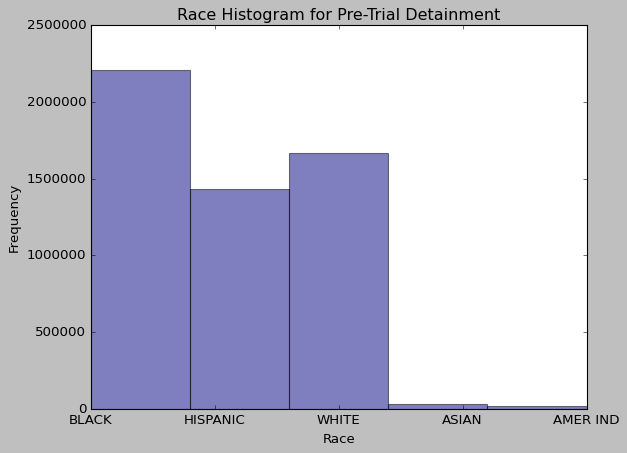

In [133]:
# Race Histogram
plt.hist(df.RACE, bins=5, facecolor='navy', alpha=0.5)
plt.title('Race Histogram for Pre-Trial Detainment')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

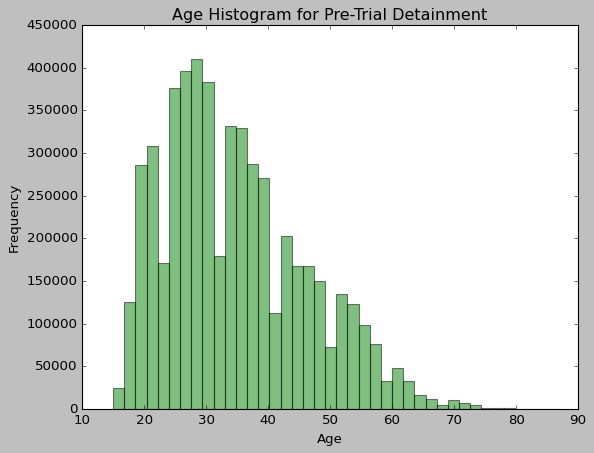

In [119]:
# Age Histogram
plt.hist(df.AGE, bins=40, facecolor='green', alpha=0.5)
plt.title('Age Histogram for Pre-Trial Detainment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

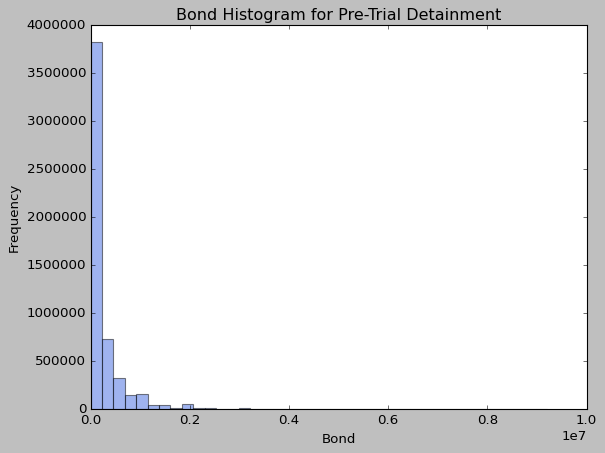

In [120]:
# Bond Histogram
plt.hist(df.Bond, bins=40, facecolor='royalblue', alpha=0.5)
plt.title('Bond Histogram for Pre-Trial Detainment')
plt.xlabel('Bond')
plt.ylabel('Frequency')
plt.show()

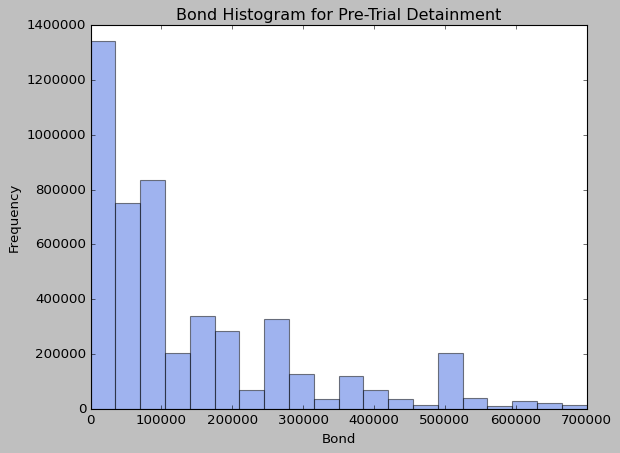

In [124]:
# Change Range on Bond Histogram
# example: plt.hist(hmag, 30, range=[6.5, 12.5], facecolor='gray', align='mid')
# Bond Histogram
plt.hist(df.Bond, bins=20, range = [0, 700000], facecolor='royalblue', alpha=0.5)
plt.title('Bond Histogram for Pre-Trial Detainment')
plt.xlabel('Bond')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Histogram Example with best fit line
#import numpy as np
#import matplotlib.mlab as mlab
#import matplotlib.pyplot as plt

# example data
#
#mu = 100 # mean of distribution
#sigma = 15 # standard deviation of distribution
#x = mu + sigma * np.random.randn(10000)

#num_bins = 20
# the histogram of the data
#n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'r--')
#plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
#plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


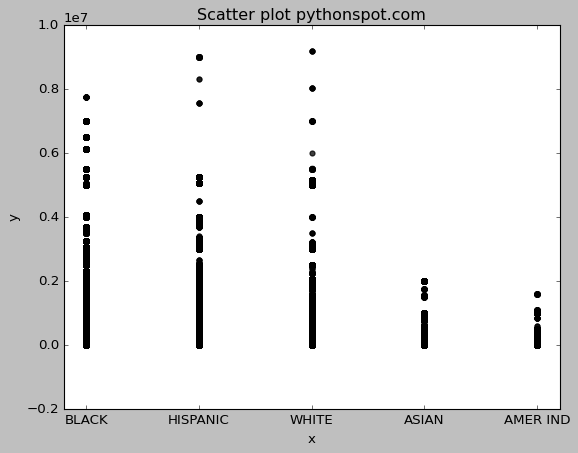

In [137]:
# Plot
plt.scatter(df.RACE, df.Bond, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


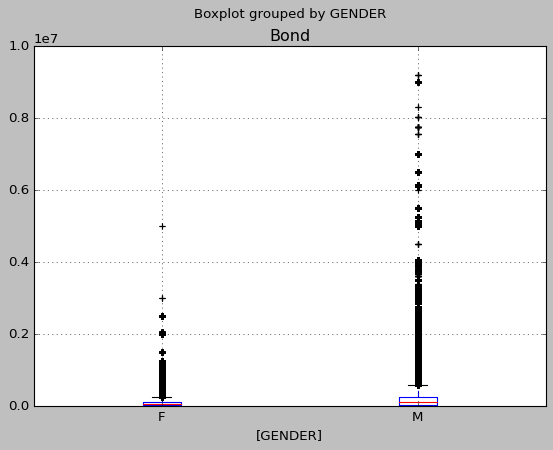

In [142]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


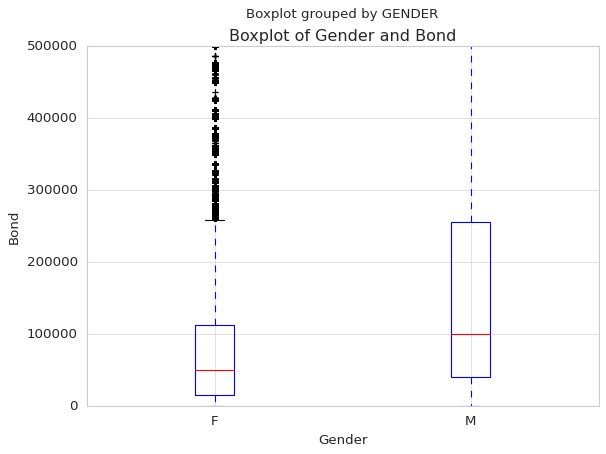

In [182]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])
plt.ylim(0, 500000)
plt.xlabel("Gender")
plt.ylabel("Bond")
plt.title("Boxplot of Gender and Bond")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Race and Bond')

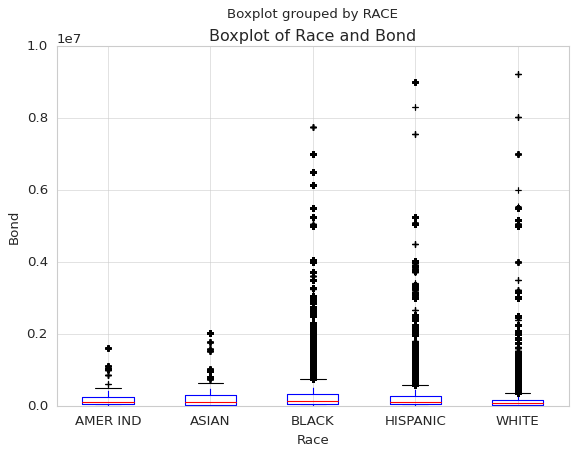

In [183]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


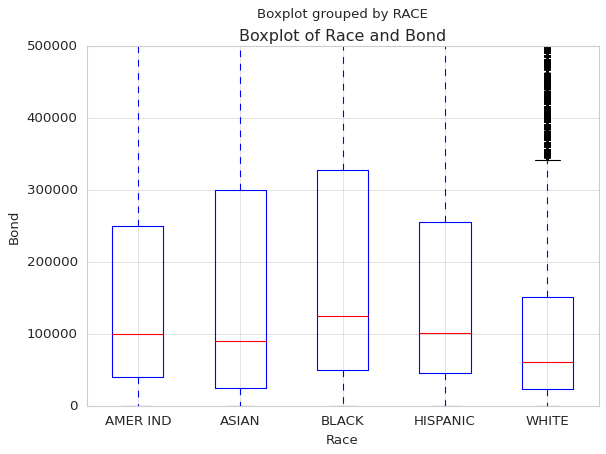

In [184]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.ylim(0, 500000)
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")
plt.show()

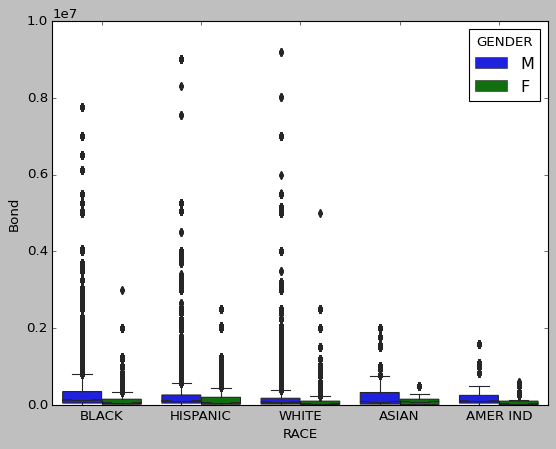

In [153]:
#Importing required modules
import seaborn as sns
import pandas as ppd
 
 
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER' , notch = True )

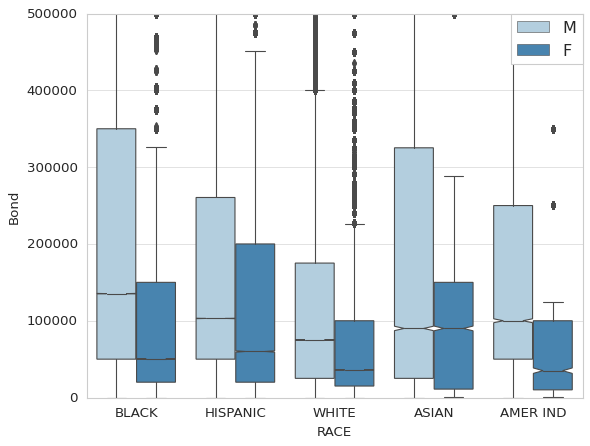

In [175]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(0, 500000)
plt.show()

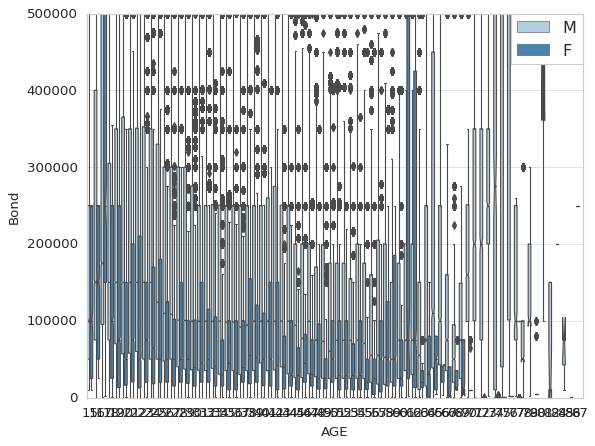

In [178]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'AGE' , y = 'Bond' , hue = 'GENDER', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(0, 500000)
plt.show()

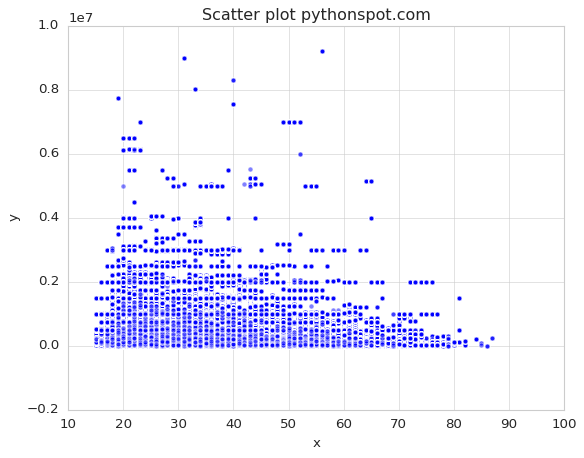

In [179]:
# Plot of Age and Bond
plt.scatter(df.AGE, df.Bond, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

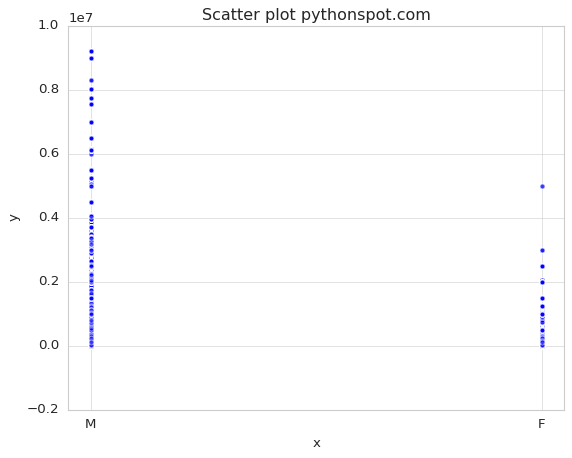

In [180]:
# Plot of Gender and Bond
plt.scatter(df.GENDER, df.Bond, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Statistics**

In [ ]:
# Multiple functions
grouped['C'].agg([np.sum, np.mean, np.std])

In [ ]:
df.groupby('A').aggregate('C').mean()

In [ ]:
df.groupby('A').C.mean()

In [139]:
# Median Bootstrapping 
bootstrap = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.median() for i in range (1000)]})

In [140]:
bootstrap.head()

,df
0,92050.0
1,152500.0
2,92500.0
3,125500.0
4,100100.0


In [141]:
bootstrap.median()

df    100000.0
dtype: float64

In [142]:
df.Bond.median()

100000.0

In [146]:
# Median Bootstrapping 2
bootstrap2 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.median() for i in range (1000)]})

In [147]:
bootstrap2.median()

df    100000.0
dtype: float64

In [150]:
# Median Bootstrapping 3
bootstrap3 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.median() for i in range (5000)]})

In [151]:
bootstrap3.median()

df    100000.0
dtype: float64

In [152]:
df.Bond.mean()

247793.66567650487

In [154]:
# Mean Bootstrapping 
bootstrap4 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.mean() for i in range (5000)]})
bootstrap4.mean()

df    247360.216342
dtype: float64

In [155]:
# Mean Bootstrapping 2
bootstrap5 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.mean() for i in range (5000)]})
bootstrap5.mean()

df    248065.519118
dtype: float64